In [89]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
#from catboost import Pool, CatBoostClassifier

from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

In [2]:
a= pd.read_csv("loan.csv")

C:\Users\imsid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



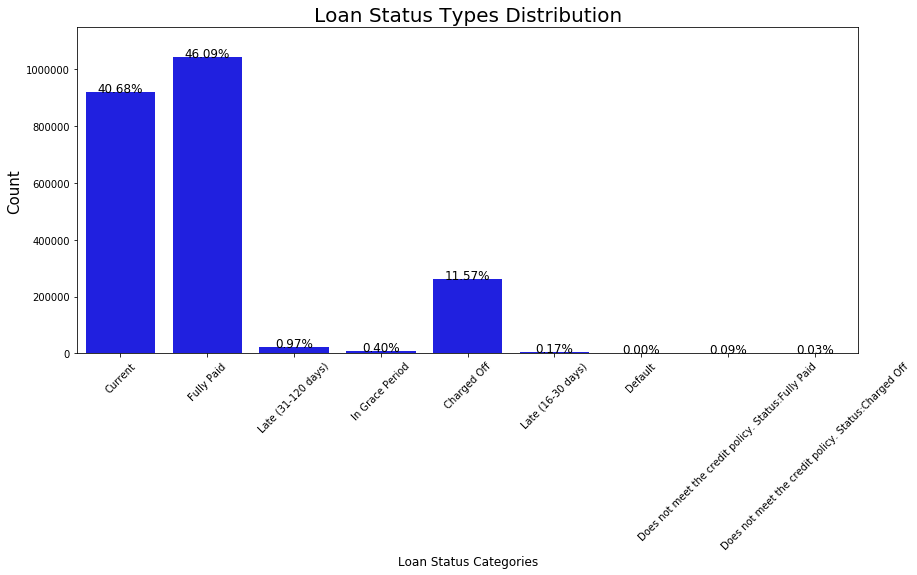

In [91]:
total = len(a)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=a, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [92]:
#The values of interest are Fully Paid, Charged Off and Default values;
df_loan = a.loc[a['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

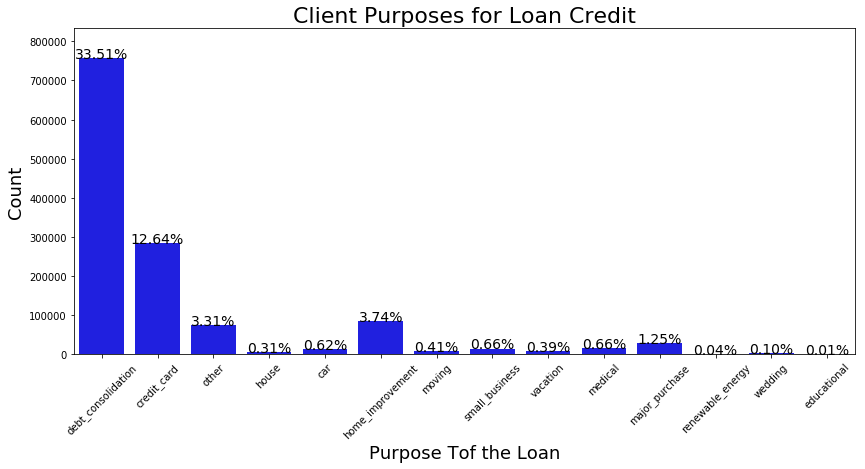

In [95]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df_loan, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Tof the Loan", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

In [96]:
# The top 3 purposes are:

#33.51% of the Loans are to Debt Consolidation
#12.64% are to pay Credit Card
#3.74% to Home Improvement
#and many others purposes that sums 13.94%

array(['debt_consolidation', 'credit_card', 'other', 'house', 'car',
       'home_improvement', 'moving', 'small_business', 'vacation',
       'medical', 'major_purchase', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

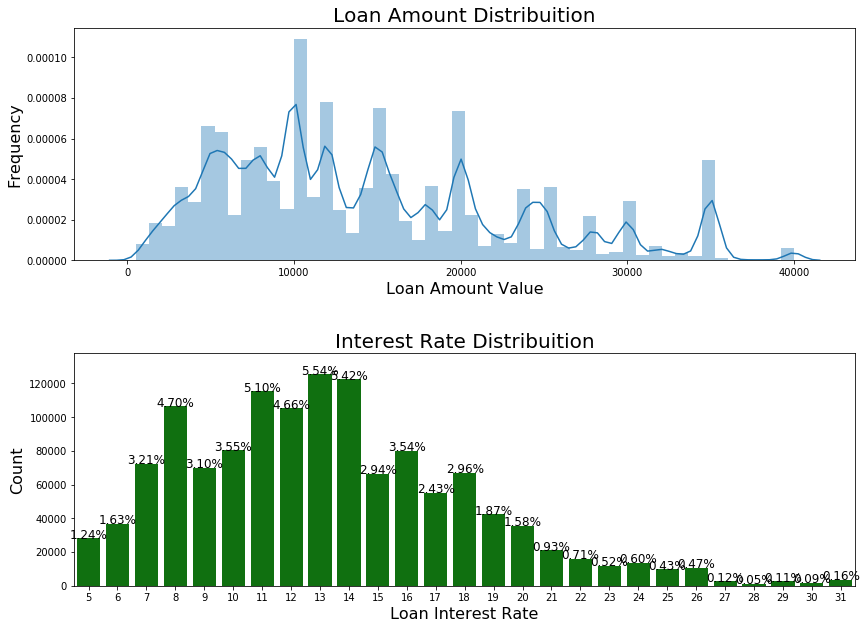

In [98]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df_loan, 
                  color='green')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
#We can note that a big part of the loans are values until USD 10,000 ( we will explore the quantiles and outliers too)
#Also, many part of all loans have interest between 7% and 14%;
#In Interest Rate: The most common is 13%, followed by 14% and 12%

In [101]:
df_loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [100]:
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

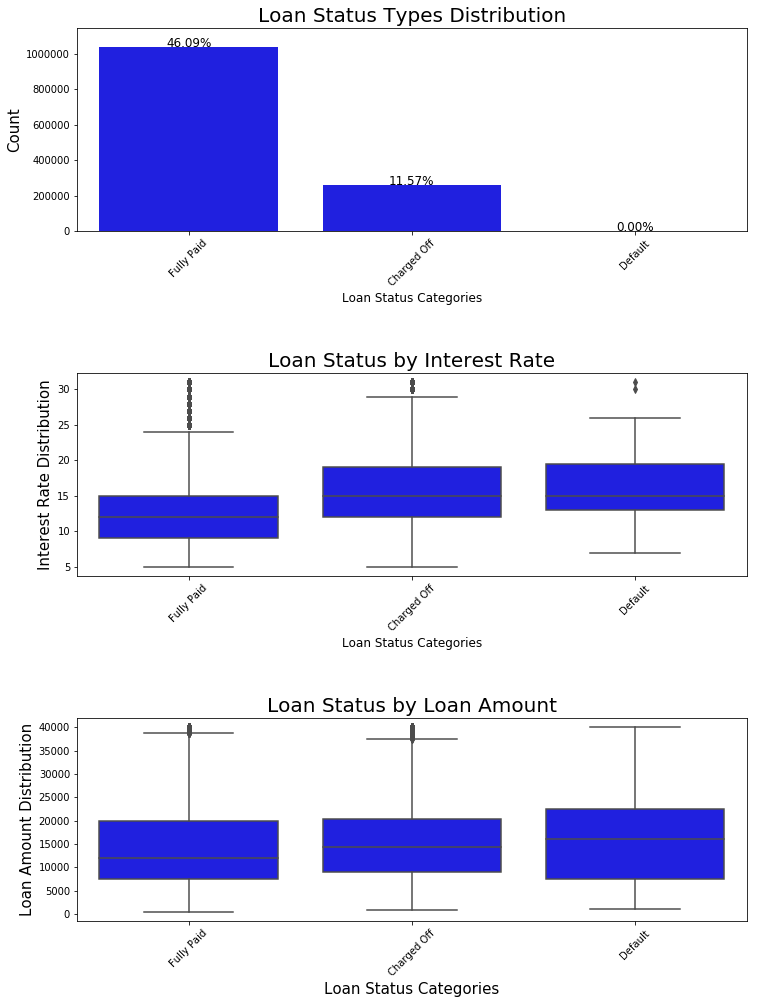

In [102]:
plt.figure(figsize = (12,16))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df_loan, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

In [104]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

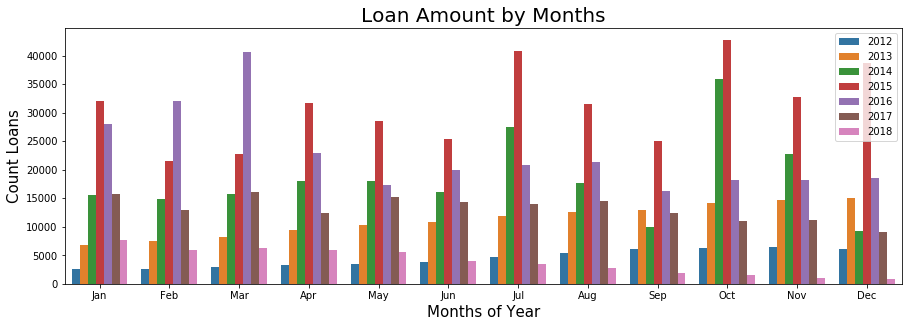

In [106]:
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],
                                        categories=months_order, 
                                        ordered=True)
#Issue_d x loan_amount
plt.figure(figsize = (15,16))

plt.subplot(311)
g = sns.countplot(x='issue_month', hue='issue_year', 
                  data=df_loan[df_loan['issue_year'].astype(int) >= 2012])
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months of Year", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)


plt.show()

In [108]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df_loan[purp_loan[0]], df_loan[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
purpose,,,
car,0.79,3.23,1.16
credit_card,18.59,12.9,22.75
debt_consolidation,61.55,61.29,57.25
educational,0.02,0,0.03
home_improvement,5.77,6.45,6.66
house,0.58,0,0.52
major_purchase,2.03,0,2.21
medical,1.26,3.23,1.13
moving,0.82,3.23,0.67


In [109]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,13766,51077,83262,59441,35364,14263,4482
Default,2,6,9,8,4,2,0
Fully Paid,212477,329075,286666,135839,56206,17220,4469


In [110]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]], 
            values=df_loan['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.39,10.79,14.07,17.76,21.16,25.05,27.91
Default,7.03,10.8,14.15,18.73,25.53,30.22,0
Fully Paid,7.11,10.67,14.01,17.67,21.07,24.77,27.47


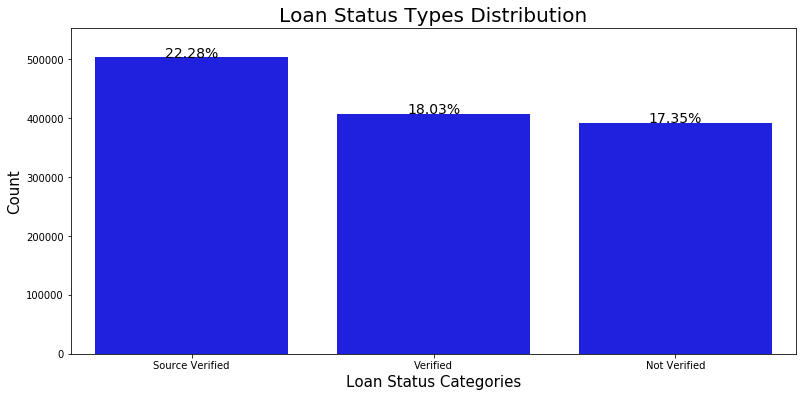

In [111]:
plt.figure(figsize = (13,6))

g = sns.countplot(x="verification_status", data=df_loan, 
                  color='blue')
g.set_xlabel("Loan Status Categories", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [112]:
#Looking the 'verification_status' column that is the Indicates 
#if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_verification[0]], df_loan[loan_verification[1]], 
            normalize='index').style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,0.220512,0.406554,0.372934
Default,0.225806,0.354839,0.419355
Fully Paid,0.321039,0.381351,0.297611


In [113]:
#Exploring the loan_status x Application_type
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_application[0]], df_loan[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,Individual,Joint App
loan_status,,
Charged Off,255926,5729
Default,24,7
Fully Paid,1024444,17508


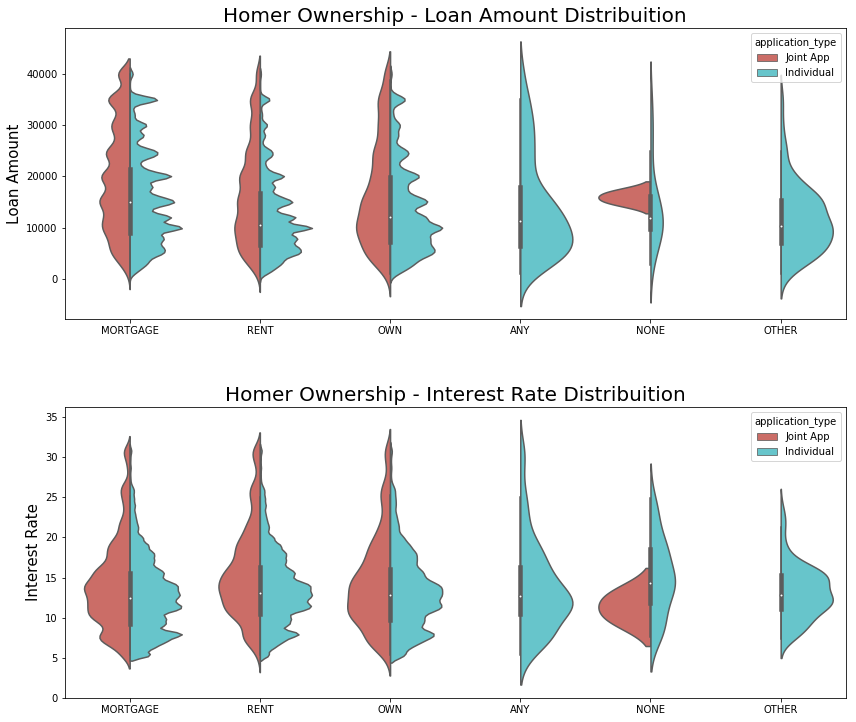

In [114]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x="home_ownership",y="loan_amnt",data=df_loan,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Amount Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="home_ownership",y="int_rate",data=df_loan,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g1.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Interest Rate", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()


In [115]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[loan_home[0]], df_loan[loan_home[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,0.43,0,0,0.11,0.46
Default,0,0.42,0,0,0.16,0.42
Fully Paid,0,0.51,0,0,0.11,0.38


In [116]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
#First plot
trace0 = go.Bar(
    x = df_loan.emp_title.value_counts()[:40].index.values,
    y = df_loan.emp_title.value_counts()[:40].values,
    marker=dict(
        color=df_loan.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')


In [63]:
loan = a[["loan_status" , "loan_amnt" , "int_rate" , "grade" , "emp_length" , "home_ownership" , "annual_inc" , "term"]]
loan.tail(10)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
2260658,Fully Paid,15000,16.02,C,< 1 year,RENT,85000.0,60 months
2260659,Current,3500,10.91,B,NaN,OWN,21000.0,36 months
2260660,Current,10000,12.62,C,5 years,RENT,65000.0,36 months
2260661,In Grace Period,21000,30.94,G,NaN,MORTGAGE,90000.0,60 months
2260662,Current,30000,30.75,F,6 years,MORTGAGE,100000.0,60 months
2260663,Current,12000,14.08,C,10+ years,MORTGAGE,58000.0,60 months
2260664,Fully Paid,12000,25.82,E,< 1 year,MORTGAGE,30000.0,60 months
2260665,Current,10000,11.99,B,10+ years,OWN,64000.0,36 months
2260666,Current,12000,21.45,D,NaN,RENT,60000.0,60 months
2260667,Current,16550,21.45,D,3 years,RENT,60000.0,60 months


In [64]:
loan.isna().sum()

loan_status            0
loan_amnt              0
int_rate               0
grade                  0
emp_length        146907
home_ownership         0
annual_inc             4
term                   0
dtype: int64

In [65]:
loan = loan[loan['emp_length'].notnull()]
loan = loan[loan['annual_inc'].notnull()]
loan.shape

(2113757, 8)

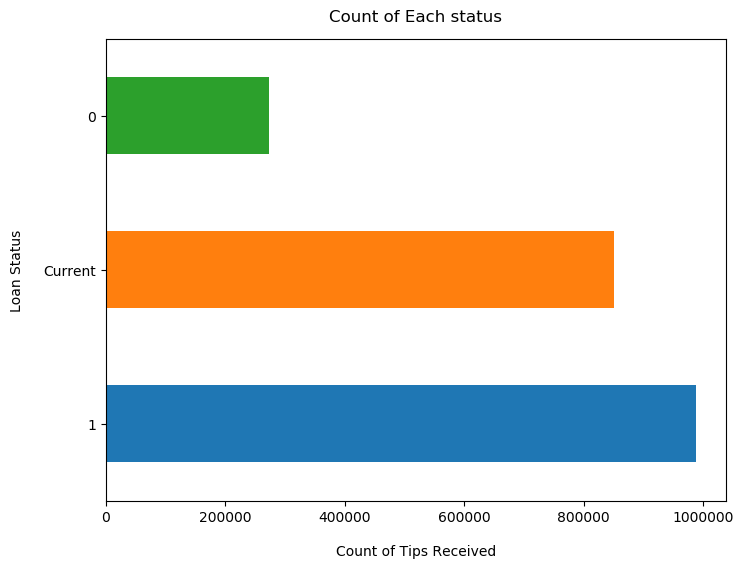

In [76]:
loan['loan_status'].value_counts().plot(kind='barh', figsize=(8, 6))

plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Loan Status", labelpad=14)
plt.title("Count of Each status", y=1.02);

In [68]:
loan['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [69]:
loan.loan_status[loan.loan_status == 'Fully Paid'] = 1 
loan.loan_status[loan.loan_status == 'Does not meet the credit policy. Status:Fully Paid']   = 1

loan.loan_status[loan.loan_status == 'Late (31-120 days)'] = 0 
loan.loan_status[loan.loan_status == 'In Grace Period'] = 0 
loan.loan_status[loan.loan_status == 'Charged Off'] = 0 
loan.loan_status[loan.loan_status == 'Late (16-30 days)'] = 0 
loan.loan_status[loan.loan_status == 'Default'] = 0 
loan.loan_status[loan.loan_status == 'Does not meet the credit policy. Status:Charged Off'] = 0 

In [77]:
#loan2=loan.loc[(['loan_status'] == 1)or (loan['loan_status'] == 0)]
#loan2=loan.loc[(['loan_status'] == 1)|(loan['loan_status'] == 0)]
loan2=loan[loan.loan_status != 'Current']

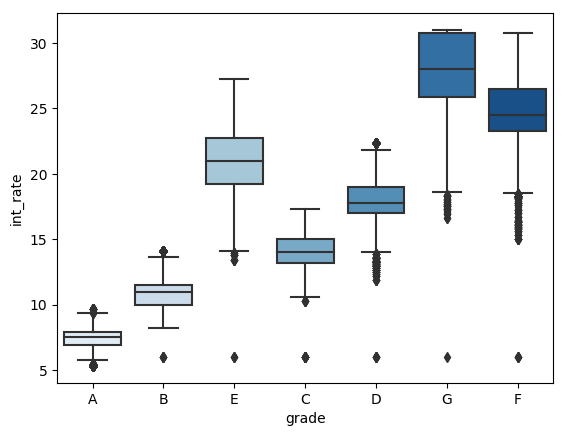

In [46]:
# library & dataset
import seaborn as sns
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}

sns.boxplot( x=loan["grade"], y=loan["int_rate"], palette="Blues")
#sns.plt.show()
